# **Audio MNIST Digit Recognition**

---------------------
## **Context**
---------------------

Audio in its raw form is usually a wave and to capture that using a data structure, we need to have a huge array of amplitudes even for a very short audio clip. Although it depends on the sampling rate of the sound wave, this structured data conversion for any audio wave is very voluminous even for low sampling rates. So it becomes a problem to store and computationally very expensive to do even simple calculations on such data.

One of the best economical alternatives to this is using spectrograms. Spectrograms are created by doing Fourier or Short Time Fourier Transforms on sound waves. There are various kinds of spectrograms but the ones we will be using are called MFCC spectrograms. To put it in simple terms, a spectrogram is a way to visually encapsulate audio data. It is a graph on a 2-D plane, and we can treat this as an image.


---------------------
## **Objective**
---------------------

The objective is to build an Artificial Neural Network that can look at Mel or MFCC spectrograms of audio files and classify them into 10 classes. The audio files are recordings of different speakers uttering a particular digit and the corresponding class to be predicted is the digit itself.

---------------------
## **Dataset**
---------------------

The dataset is the **Audio MNIST dataset**, which has audio files (having .wav extension) stored in 10 different folders. Each folder consists of these digits spoken by a particular speaker.

## **Importing the necessary libraries and loading the data**

In [ ]:
# For Audio Preprocessing
import librosa
import librosa.display as dsp
from IPython.display import Audio

# For Data Preprocessing
import pandas as pd
import numpy as np
import os

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


#The data is provided as a zip file
import zipfile
import os

In [ ]:
sns.set_style("dark")

### **Mounting the Drive and Unzipping the file**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Audio_MNIST_Archive.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()



 "get_audio" takes a digit as an argument and plots the audio wave and returns the audio for a given digit. 


In [ ]:
def get_audio(digit = 0):

    # Audio Sample Directory
    sample = np.random.randint(1, 10)

    # Index of Audio
    index = np.random.randint(1, 5)
    
    # Modified file location
    if sample < 10:
        file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

    else:
        file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    # Audio will be automatically resampled to the given rate (default sr = 22050)
    data, sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data, sr = sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data = data, rate = sample_rate)

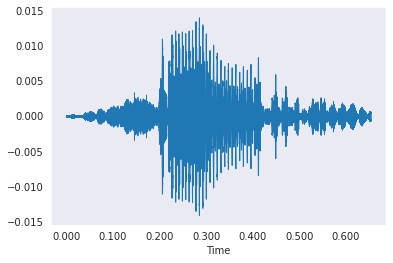

In [ ]:
# Show the audio and plot of digit 0
get_audio(0)

**Observations:** 

- The X-axis represents time and Y-axis represents the amplitude of the vibrations. The intuition behind the Fourier Transform is that any wave can be broken down or deconstructed as a sum of many composite sine waves. Since these are composed of sine waves, they are symmetric about the time axis. 


## **Visualizing the spectrogram of the audio data**



Here, I **MFCC** spectrograms, which are also called **Mel** spectrograms.

In [ ]:
# returns audio file for a mentioned digit
def get_audio_raw(digit = 0):

    # Audio Sample Directory
    sample = np.random.randint(1, 10)

    # Index of Audio
    index = np.random.randint(1, 5)
    
    # Modified file location
    if sample < 10:
        file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

    else:
        file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data, sample_rate = librosa.load(file)

    return data, sample_rate

### **Extracting features from the audio file**


In this time step, I will first extract the Mel Coefficents for each audio file and add them to our dataset.


**Creating a function that extracts the data from audio files**

In [ ]:
# return extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT as the output
def extract_features(file):

    # Load audio， sample rate
    audio, sample_rate = librosa.load(file)

    # Extract features 
    extracted_features = librosa.feature.mfcc(y = audio,
                                              sr = sample_rate,
                                              n_mfcc = 40)
    # Scale 
    extracted_features = np.mean(extracted_features.T, axis = 0)

    return extracted_features


def preprocess_and_create_dataset():
    root_folder_path = "/content/data/"
    dataset = []
    
    for folder in tqdm(range(1, 11)):

        if folder < 10:
            folder = os.path.join(root_folder_path, "0" + str(folder))

        else:
            folder = os.path.join(root_folder_path, str(folder))
          
        for file in tqdm(os.listdir(folder)):
            abs_file_path = os.path.join(folder, file)

            #create features
            extracted_features = extract_features(abs_file_path) 
            class_label = file[0]
            dataset.append([extracted_features, class_label])

    return pd.DataFrame(dataset, columns = ['features', 'class'])

create the dataset using the defined function

In [ ]:
dataset = preprocess_and_create_dataset()

100%|██████████| 10/10 [05:48<00:00, 34.84s/it]


**View first 5 rows of the data**

In [ ]:
dataset.head()

,features,class
0,"[-645.8865, 115.37195, 18.810076, 26.47117, 29...",2
1,"[-667.8995, 107.37916, 24.942139, 33.785206, 2...",2
2,"[-620.51196, 135.07425, 13.153506, 7.5672665, ...",4
3,"[-662.0, 113.45547, 23.51534, 32.67987, 31.511...",2
4,"[-567.021, 89.2004, -8.5916395, 17.206861, 15....",5


In [ ]:
# Storing the class as int
dataset['class'] = [int(x) for x in dataset['class']]

In [ ]:
dataset['class'].value_counts()

2    500
4    500
5    500
6    500
3    500
1    500
7    500
8    500
0    500
9    500
Name: class, dtype: int64

### **Visualizing the Mel Frequency Cepstral Coefficients Using a Spectrogram**

* It is creating the 2-D graph of those coefficients with the X-axis representing time and the Y-axis shows the corresponding Mel coefficients in that time step. 

In [ ]:
#  returns MFCC
def draw_spectrograms(audio_data, sample_rate):

    # Extract features
    extracted_features = librosa.feature.mfcc(y = audio_data,
                                              sr = sample_rate,
                                              n_mfcc = 40)
    
    return extracted_features

The very first MFCC coefficient (0th coefficient) does not provide information about the overall shape of the spectrum. It simply communicates a constant offset or the addition of a constant value to the full spectrum. As a result, when performing classification, many practitioners will disregard the initial MFCC. In the images, those are represented by blue pixels.

We can plot the MFCCs, but it's difficult to tell what kind of signal is hiding behind such representation.

Shape of MFCC of audio digit 0 --->  (40, 36)
Shape of MFCC of audio digit 1 --->  (40, 25)
Shape of MFCC of audio digit 2 --->  (40, 25)
Shape of MFCC of audio digit 3 --->  (40, 22)
Shape of MFCC of audio digit 4 --->  (40, 36)
Shape of MFCC of audio digit 5 --->  (40, 25)
Shape of MFCC of audio digit 6 --->  (40, 29)
Shape of MFCC of audio digit 7 --->  (40, 35)
Shape of MFCC of audio digit 8 --->  (40, 20)
Shape of MFCC of audio digit 9 --->  (40, 25)


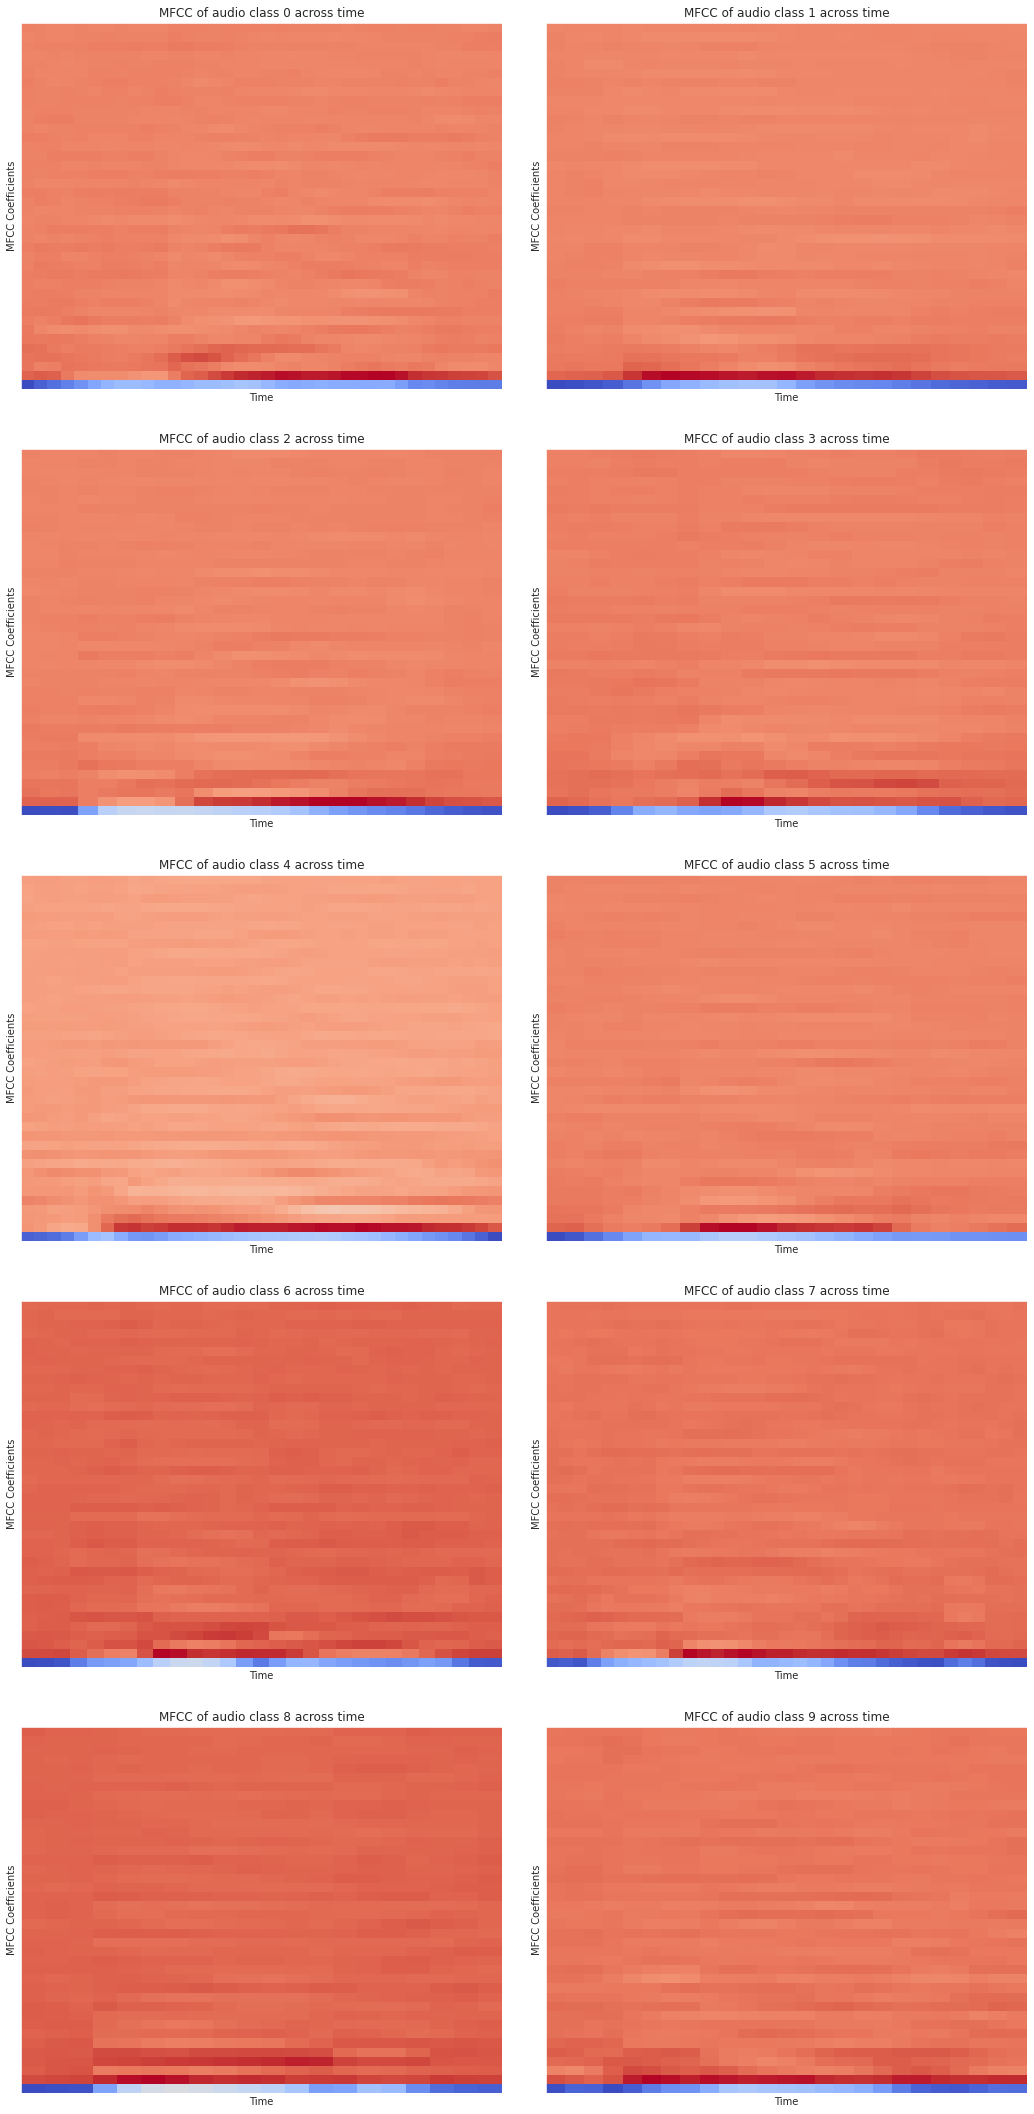

In [ ]:
# Creating subplots
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):

    # Get the audio of different classes (0-9)
    audio_data, sample_rate = get_audio_raw(digit)
    
    # Extract their MFCC
    mfcc = draw_spectrograms(audio_data, sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ", mfcc.shape)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc, sr = 22050, ax = ax[row, column])
    
    # Set X-labels and Y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad = 3)   
plt.show()

**Visual Inspection of MFCC Spectrograms:**

On inspecting them visually, we can see that there are a lot of deviations from the spectrograms of one audio to another. There are a lot of tiny rectangles and bars whose positions are unique to each audio. So, the Artificial Neural Network should be able to perform decently in identifying these audios.

## **Train-Test-Split**


In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, shuffle = True, random_state = 8)

In [ ]:
X_train.shape

(3750, 40)

## **Modelling**



In [ ]:
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint

# load the model
from tensorflow.keras.models import load_model

# evaluate 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

## **Model Creation**




In [ ]:
model = Sequential()

# first layer： 100 neurons 
model.add(Dense(100, input_shape = (40, ), activation = 'relu'))

# second layer：100 neurons 
model.add(Dense(100, activation = 'relu'))

# third layer： 100 neurons 
model.add(Dense(100, activation = 'relu'))

# Output layer: 10 neurons(it has 10 classes)
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

### **Model Checkpoint & Training**

In [ ]:
num_epochs = 100

batch_size = 32

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
118/118 [==============================] - 2s 6ms/step - loss: 4.4280 - accuracy: 0.4341 - val_loss: 0.7664 - val_accuracy: 0.7216
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 0.5744 - accuracy: 0.7936 - val_loss: 0.3355 - val_accuracy: 0.9064
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.8427 - val_loss: 0.4617 - val_accuracy: 0.8512
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8957 - val_loss: 0.2498 - val_accuracy: 0.9072
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2772 - accuracy: 0.8987 - val_loss: 0.5515 - val_accuracy: 0.8320
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9421 - val_loss: 0.1448 - val_accuracy: 0.9512
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9512 - val_loss: 0.1051 - val_accuracy: 0.9592

### **Model Evaluation**

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

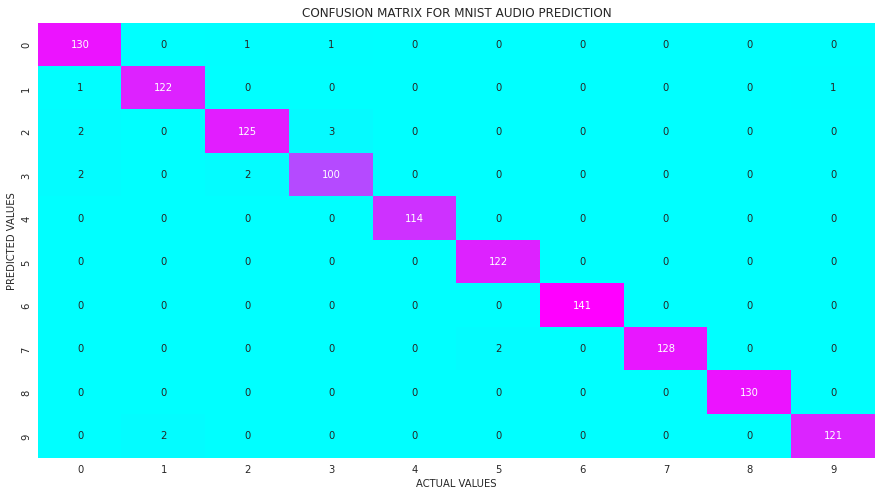

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.98      0.98       124
           2       0.98      0.96      0.97       130
           3       0.96      0.96      0.96       104
           4       1.00      1.00      1.00       114
           5       0.98      1.00      0.99       122
           6       1.00      1.00      1.00       141
           7       1.00      0.98      0.99       130
           8       1.00      1.00      1.00       130
           9       0.99      0.98      0.99       123

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [ ]:
sns.set_style("dark")
plt.figure(figsize = (15, 8))

plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")

cm = confusion_matrix([int(x) for x in Y_test], Y_pred)

sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

plt.show()
print(classification_report(Y_test, Y_pred))

**Observations:**

- From the confusion matrix, we can observe that most of the observations are correctly identified by the model. 
- In very few cases, the model is not able to identify the correct digit. For example, 9 observations are 0 but the model has predicted them as 2. 
- The model has given a great performance with 99% recall, precision and F1-score. 